In [ ]:
TRAIN_CSV_PATH='../../dataset/train_feat.csv'
TEST_CSV_PATH='../../dataset/test_feat.csv'



In [1]:
import numpy as np
def featurizer(train_df,test_df):
    train_df["W/L"]=train_df["Width (mm)"]/train_df["Length (mm)"]
    train_df["L/T"]=train_df["Length (mm)"]/train_df["Thickness (mm)"]
    train_df["W/T"]=train_df["Thickness (mm)"]/train_df["Width (mm)"]
    train_df["Total_Alloy_wt"] = train_df[[
        "C, wt.%", "Si, wt.%", "Mn, wt.%", "P, wt.%", "S, wt.%",
        "Ni, wt.%", "Cr, wt.%", "Mo, wt.%", "Al, wt.%", "N, wt.%",
        "Ti, wt.%", "Nb, wt.%", "B, wt.%", "Cu, wt.%", "V, wt.%",
        "Zr, wt.%", "W, wt.%", "Sn, wt.%", "Co, wt.%", "O, wt,%",
        "Ta, wt.%", "As, wt%", "Sb, wt.%"
    ]].sum(axis=1)

    train_df["Embrittling_Elements"] = (
        train_df["P, wt.%"] +
        train_df["S, wt.%"] +
        train_df["Cu, wt.%"] +
        train_df["As, wt%"] +
        train_df["Sb, wt.%"] +
        train_df["B, wt.%"]
    )

    train_df["Toughness_Enhancers"] = (
        train_df["Ni, wt.%"] +
        train_df["Mn, wt.%"] +
        train_df["Mo, wt.%"] +
        train_df["V, wt.%"] +
        train_df["Ti, wt.%"] +
        train_df["Nb, wt.%"]
    )

    train_df["Hardener_Elements"] = (
        train_df["C, wt.%"] +
        train_df["Cr, wt.%"] +
        train_df["Mo, wt.%"] +
        train_df["V, wt.%"] +
        train_df["W, wt.%"]
    )

    train_df["Aging_Sensitive"] = (
        train_df["Cu, wt.%"] +
        train_df["Ni, wt.%"] +
        train_df["P, wt.%"]
    )

    train_df["Carbon_Equivalent"] = (
        train_df["C, wt.%"] +
        (train_df["Mn, wt.%"] + train_df["Si, wt.%"]) / 6 +
        (train_df["Cr, wt.%"] + train_df["Mo, wt.%"] + train_df["V, wt.%"]) / 5 +
        (train_df["Ni, wt.%"] + train_df["Cu, wt.%"]) / 15
    )

    train_df["Fe_Deficit"] = 100 - train_df["Fe, wt.%"]

    # Compute derived features for alloy analysis
    test_df["W/L"]=test_df["Width (mm)"]/test_df["Length (mm)"]
    test_df["L/T"]=test_df["Length (mm)"]/test_df["Thickness (mm)"]
    test_df["W/T"]=test_df["Thickness (mm)"]/test_df["Width (mm)"]
    test_df["Total_Alloy_wt"] = test_df[[
        "C, wt.%", "Si, wt.%", "Mn, wt.%", "P, wt.%", "S, wt.%",
        "Ni, wt.%", "Cr, wt.%", "Mo, wt.%", "Al, wt.%", "N, wt.%",
        "Ti, wt.%", "Nb, wt.%", "B, wt.%", "Cu, wt.%", "V, wt.%",
        "Zr, wt.%", "W, wt.%", "Sn, wt.%", "Co, wt.%", "O, wt,%",
        "Ta, wt.%", "As, wt%", "Sb, wt.%"
    ]].sum(axis=1)
    test_df["Embrittling_Elements"] = (
        test_df["P, wt.%"] +
        test_df["S, wt.%"] +
        test_df["Cu, wt.%"] +
        test_df["As, wt%"] +
        test_df["Sb, wt.%"] +
        test_df["B, wt.%"]
    )

    test_df["Toughness_Enhancers"] = (
        test_df["Ni, wt.%"] +
        test_df["Mn, wt.%"] +
        test_df["Mo, wt.%"] +
        test_df["V, wt.%"] +
        test_df["Ti, wt.%"] +
        test_df["Nb, wt.%"]
    )

    test_df["Hardener_Elements"] = (
        test_df["C, wt.%"] +
        test_df["Cr, wt.%"] +
        test_df["Mo, wt.%"] +
        test_df["V, wt.%"] +
        test_df["W, wt.%"]
    )

    test_df["Aging_Sensitive"] = (
        test_df["Cu, wt.%"] +
        test_df["Ni, wt.%"] +
        test_df["P, wt.%"]
    )

    test_df["Carbon_Equivalent"] = (
        test_df["C, wt.%"] +
        (test_df["Mn, wt.%"] + test_df["Si, wt.%"]) / 6 +
        (test_df["Cr, wt.%"] + test_df["Mo, wt.%"] + test_df["V, wt.%"]) / 5 +
        (test_df["Ni, wt.%"] + test_df["Cu, wt.%"]) / 15
    )

    test_df["Fe_Deficit"] = 100 - test_df["Fe, wt.%"]

    eps = 1e-6  # small value to avoid divide-by-zero


    # 1. Composition Ratios
    train_df['C_Mn'] = train_df['C, wt.%'] / (train_df['Mn, wt.%'] + eps)
    train_df['Cr_Mo_V_Ni'] = train_df[['Cr, wt.%', 'Mo, wt.%', 'V, wt.%', 'Ni, wt.%']].sum(axis=1)
    train_df['NiMn_to_CrMoV'] = (train_df['Ni, wt.%'] + train_df['Mn, wt.%']) / (train_df['Cr, wt.%'] + train_df['Mo, wt.%'] + train_df['V, wt.%'] + eps)
    train_df['Ni_to_Fe'] = train_df['Ni, wt.%'] / (train_df['Fe, wt.%'] + eps)
    train_df['Cr_to_Fe'] = train_df['Cr, wt.%'] / (train_df['Fe, wt.%'] + eps)
    train_df['Mo_to_Fe'] = train_df['Mo, wt.%'] / (train_df['Fe, wt.%'] + eps)

    # 2. Geometry & Stress Features
    train_df['Volume'] = train_df['Length (mm)'] * train_df['Width (mm)'] * train_df['Thickness (mm)']
    train_df['Surface_Area'] = 2 * (
        train_df['Length (mm)'] * train_df['Width (mm)'] +
        train_df['Length (mm)'] * train_df['Thickness (mm)'] +
        train_df['Width (mm)'] * train_df['Thickness (mm)']
    )
    train_df['Compactness'] = train_df['Volume'] / (train_df['Surface_Area'] + eps)

    # Compute missing 'Area' as cross-sectional area
    train_df['Area'] = train_df['Width (mm)'] * train_df['Thickness (mm)']
    train_df['Impact_energy_per_Area'] = train_df['Impact energy (J)'] / (train_df['Area'] + eps)
    train_df['Impact_energy_per_Volume'] = train_df['Impact energy (J)'] / (train_df['Volume'] + eps)

    # 3. Elemental diversity
    element_cols = [col for col in train_df.columns if ', wt.%' in col]
    norm_composition = train_df[element_cols].div(train_df[element_cols].sum(axis=1) + eps, axis=0)
    train_df['Elemental_count'] = (train_df[element_cols] > 0).sum(axis=1)
    train_df['Std_dev_wt'] = train_df[element_cols].std(axis=1)
    train_df['Shannon_entropy_composition'] = -(norm_composition * np.log(norm_composition + eps)).sum(axis=1)

    # 4. Interaction terms
    train_df['C_times_Mn'] = train_df['C, wt.%'] * train_df['Mn, wt.%']
    train_df['Mn_times_Cr'] = train_df['Mn, wt.%'] * train_df['Cr, wt.%']
    train_df['Ni_times_Mo'] = train_df['Ni, wt.%'] * train_df['Mo, wt.%']

    # 5. Physics-inspired placeholders
    magpie_cols = train_df.columns[train_df.columns.str.contains('CovalentRadius') & train_df.columns.str.contains('range')]
    if len(magpie_cols):
        train_df['Solid_solution_strengthening'] = train_df[magpie_cols[0]] * train_df[element_cols].std(axis=1)
    else:
        train_df['Solid_solution_strengthening'] = np.nan

    train_df['Hardness_index'] = (
        0.5 * train_df['C, wt.%'] +
        0.3 * train_df['Mn, wt.%'] +
        0.2 * train_df['Mo, wt.%'] +
        0.1 * train_df['Ni, wt.%']
    )



    # 1. Composition Ratios
    test_df['C_Mn'] = test_df['C, wt.%'] / (test_df['Mn, wt.%'] + eps)
    test_df['Cr_Mo_V_Ni'] = test_df[['Cr, wt.%', 'Mo, wt.%', 'V, wt.%', 'Ni, wt.%']].sum(axis=1)
    test_df['NiMn_to_CrMoV'] = (test_df['Ni, wt.%'] + test_df['Mn, wt.%']) / (test_df['Cr, wt.%'] + test_df['Mo, wt.%'] + test_df['V, wt.%'] + eps)
    test_df['Ni_to_Fe'] = test_df['Ni, wt.%'] / (test_df['Fe, wt.%'] + eps)
    test_df['Cr_to_Fe'] = test_df['Cr, wt.%'] / (test_df['Fe, wt.%'] + eps)
    test_df['Mo_to_Fe'] = test_df['Mo, wt.%'] / (test_df['Fe, wt.%'] + eps)

    # 2. Geometry & Stress Features
    test_df['Volume'] = test_df['Length (mm)'] * test_df['Width (mm)'] * test_df['Thickness (mm)']
    test_df['Surface_Area'] = 2 * (
        test_df['Length (mm)'] * test_df['Width (mm)'] +
        test_df['Length (mm)'] * test_df['Thickness (mm)'] +
        test_df['Width (mm)'] * test_df['Thickness (mm)']
    )
    test_df['Compactness'] = test_df['Volume'] / (test_df['Surface_Area'] + eps)

    # Compute missing 'Area' as cross-sectional area
    test_df['Area'] = test_df['Width (mm)'] * test_df['Thickness (mm)']
    test_df['Impact_energy_per_Area'] = test_df['Impact energy (J)'] / (test_df['Area'] + eps)
    test_df['Impact_energy_per_Volume'] = test_df['Impact energy (J)'] / (test_df['Volume'] + eps)

    # 3. Elemental diversity
    element_cols = [col for col in test_df.columns if ', wt.%' in col]
    norm_composition = test_df[element_cols].div(test_df[element_cols].sum(axis=1) + eps, axis=0)
    test_df['Elemental_count'] = (test_df[element_cols] > 0).sum(axis=1)
    test_df['Std_dev_wt'] = test_df[element_cols].std(axis=1)
    test_df['Shannon_entropy_composition'] = -(norm_composition * np.log(norm_composition + eps)).sum(axis=1)

    # 4. Interaction terms
    test_df['C_times_Mn'] = test_df['C, wt.%'] * test_df['Mn, wt.%']
    test_df['Mn_times_Cr'] = test_df['Mn, wt.%'] * test_df['Cr, wt.%']
    test_df['Ni_times_Mo'] = test_df['Ni, wt.%'] * test_df['Mo, wt.%']

    # 5. Physics-inspired placeholders
    magpie_cols = test_df.columns[test_df.columns.str.contains('CovalentRadius') & test_df.columns.str.contains('range')]
    if len(magpie_cols):
        test_df['Solid_solution_strengthening'] = test_df[magpie_cols[0]] * test_df[element_cols].std(axis=1)
    else:
        test_df['Solid_solution_strengthening'] = np.nan

    test_df['Hardness_index'] = (
        0.5 * test_df['C, wt.%'] +
        0.3 * test_df['Mn, wt.%'] +
        0.2 * test_df['Mo, wt.%'] +
        0.1 * test_df['Ni, wt.%']
    )

    return train_df, test_df

In [2]:
import numpy as np

def median_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput="uniform_average"):
    """
    Median absolute percentage error regression loss.
    Compatible with sklearn-style usage.
    """
    y_true = np.array(y_true, dtype=np.float64).ravel()
    y_pred = np.array(y_pred, dtype=np.float64).ravel()

    # avoid division by zero
    nonzero_mask = y_true != 0
    if not np.any(nonzero_mask):
        raise ValueError("All y_true values are zero; MAPE cannot be calculated.")

    errors = np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])

    return np.median(errors)


In [3]:
feature_to_remove = []
feature_to_include = []
feature_to_include = ["C, wt.%",	"Si, wt.%",	"Mn, wt.%",	"P, wt.%",	"S, wt.%",	"Ni, wt.%",	"Cr, wt.%",	"Mo, wt.%",	"Al, wt.%",	"N, wt.%",	"Ti, wt.%",	"Fe, wt.%",	"Nb, wt.%",	"B, wt.%",	"Cu, wt.%",	"V, wt.%",	"Zr, wt.%",	"W, wt.%",	"Sn, wt.%",	"Co, wt.%",	"O, wt,%", "Ta, wt.%",	"As, wt%","Sb, wt.%",'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap', 'Test Temperature (C) ', 'MagpieData mean MeltingT', 'Solid_solution_strengthening', 'C_Mn', 'Embrittling_Elements', 'Impact_energy_per_Volume', 'MagpieData mean NdValence', 'Impact energy (J)', 'Impact_energy_per_Area', 'Compactness', 'MagpieData mean SpaceGroupNumber', 'Cr_to_Fe', 'MagpieData avg_dev NUnfilled', 'Area',  'MagpieData mean NValence', 'Surface_Area', 'Volume', 'MagpieData mean NUnfilled', 'MagpieData avg_dev NpUnfilled', 'MagpieData avg_dev NpValence', 'Aging_Sensitive', 'MagpieData avg_dev NsValence', 'MagpieData mean NpUnfilled', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData mean NsUnfilled', 'MagpieData mean NsValence', 'MagpieData avg_dev MeltingT', 'Ni_to_Fe', 'MagpieData mean NpValence', 'C_times_Mn', 'Elemental_count', 'NiMn_to_CrMoV', 'MagpieData avg_dev Column', 'MagpieData avg_dev NsUnfilled', 'MagpieData avg_dev NdUnfilled', 'MagpieData mean GSvolume_pa',  'MagpieData avg_dev MendeleevNumber', 'Cr_Mo_V_Ni', 'MagpieData mean Electronegativity', 'Mn_times_Cr', 'W/L', 'MagpieData mean CovalentRadius',  'L/T', 'Carbon_Equivalent', 'MagpieData avg_dev CovalentRadius']


Device: cpu
Train shape (after keep): (3694, 72)
Train shape (after outlier trim): (3466, 72)
Test shape: (390, 72)
Epoch 1/2000: Train MAE=59.4965, Val MAE=57.1260, Test MAE=48.5137, coeff=0.0000, NLL=1.1678, REG=2.3653
Epoch 100/2000: Train MAE=7.7879, Val MAE=8.1328, Test MAE=8.3494, coeff=0.1980, NLL=-0.8373, REG=0.2638
Epoch 200/2000: Train MAE=5.9767, Val MAE=6.5442, Test MAE=7.2801, coeff=0.3980, NLL=-1.4976, REG=0.0730
Epoch 300/2000: Train MAE=5.2414, Val MAE=6.1946, Test MAE=6.7082, coeff=0.5980, NLL=-1.3683, REG=0.0860
Epoch 400/2000: Train MAE=4.7409, Val MAE=5.9871, Test MAE=6.5139, coeff=0.7980, NLL=-1.5901, REG=0.0573
Epoch 500/2000: Train MAE=4.5211, Val MAE=5.8803, Test MAE=6.5139, coeff=0.9980, NLL=-1.5726, REG=0.0862
Epoch 600/2000: Train MAE=4.2632, Val MAE=5.2692, Test MAE=6.4881, coeff=1.0000, NLL=-1.5465, REG=0.0974
Epoch 700/2000: Train MAE=4.0568, Val MAE=5.2692, Test MAE=6.4276, coeff=1.0000, NLL=-2.0443, REG=0.0509
Epoch 800/2000: Train MAE=3.8265, Val MAE=4.

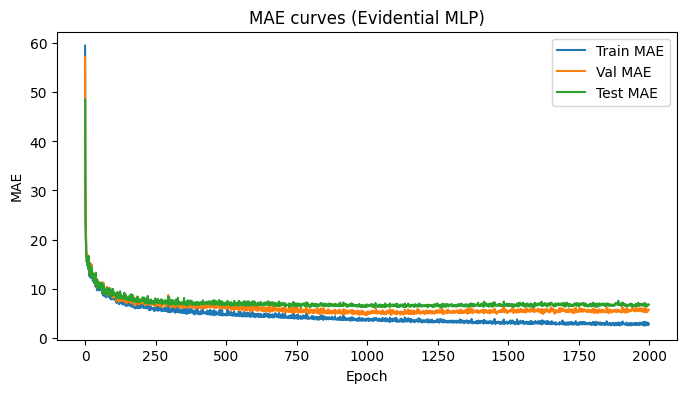

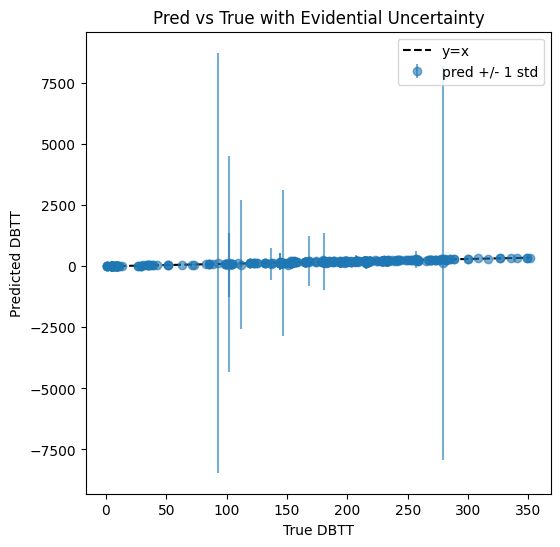

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score

# -------------------------
# Repro / device
# -------------------------
seed = 911
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


train_df = pd.read_csv(TRAIN_CSV_PATH).select_dtypes(include="number")
test_df  = pd.read_csv(TEST_CSV_PATH).select_dtypes(include="number")

train_df, test_df = featurizer(train_df, test_df)

cols_to_drop = ['DBTT', 'USE', "Width (mm)", "Length (mm)", "Thickness (mm)"]
target = "USE"

# Filter out NaNs and outliers 
train_df = train_df.dropna(subset=[target])
if 'feature_to_include' in globals() and feature_to_include:
    existing_features = [f for f in feature_to_include if f in train_df.columns]
    train_df = train_df[existing_features + [target]]
print("Train shape (after keep):", train_df.shape)

mean_val = train_df[target].mean()
std_val = train_df[target].std()
upper_bound = mean_val + 1.75 * std_val
train_df = train_df[(train_df[target] <= upper_bound)]
print("Train shape (after outlier trim):", train_df.shape)

test_df = test_df.dropna(subset=[target])
# align test columns with train columns
test_df = test_df[list(train_df.columns)]
test_df = test_df[(test_df[target] <= upper_bound)]
print("Test shape:", test_df.shape)

# -------------------------
# Prepare features / scalers / tensors
# -------------------------
X = train_df.drop(columns=cols_to_drop, errors='ignore')
y = train_df[target]
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')
y_test = test_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled   = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_tensor   = torch.tensor(y_val_scaled, dtype=torch.float32).to(device)
X_test_tensor  = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor  = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)

# -------------------------
# ----- Evidential model -----
# -------------------------
class EvidentialMLP(nn.Module):
    """
    MLP that outputs evidential NIG parameters: mu, v, alpha, beta
    We ensure positivity for v, alpha-1, beta with softplus.
    """
    def __init__(self, input_dim, hidden_dims=[512]*8, embed_dim=256, dropout=0.05):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.LeakyReLU(0.1))
            layers.append(nn.Dropout(dropout))  # helps epistemic behavior
            prev = h
        self.mlp = nn.Sequential(*layers)
        self.proj = nn.Linear(prev, embed_dim)

        # final head producing 4 numbers per sample: mu, v_raw, alpha_raw, beta_raw
        self.head = nn.Linear(embed_dim, 4)

        # small initialisation to avoid extreme initial evidence
        nn.init.xavier_uniform_(self.head.weight, gain=0.01)
        if self.head.bias is not None:
            nn.init.constant_(self.head.bias, 0.0)

        self.softplus = nn.Softplus()

    def forward(self, x):
        h = self.mlp(x)
        h = self.proj(h)
        out = self.head(h)   # (batch, 4)
        mu = out[:, 0]       # can be negative/positive
        v_raw = out[:, 1]
        alpha_raw = out[:, 2]
        beta_raw = out[:, 3]

        # ensure positivity and proper domain:
        v = self.softplus(v_raw) + 1e-6            # v > 0
        alpha = self.softplus(alpha_raw) + 1.0 + 1e-6   # alpha > 1 (we add +1 to encourage alpha>1)
        beta = self.softplus(beta_raw) + 1e-6      # beta > 0

        return mu, v, alpha, beta

# -------------------------
# Evidence / NIG losses (NLL + regularizer)
# -------------------------
# NIG negative log-likelihood (student-t predictive equivalent)
# Implementation follows common PyTorch implementations of "Deep Evidential Regression"
def nig_nll_loss(y, mu, v, alpha, beta):
    """
    y, mu: (batch,)
    v, alpha, beta: (batch,) positive
    returns: per-sample NLL (not reduced)
    """
    # Per-implementation constants
    two_blambda = 2.0 * beta * (1.0 + v)  # scalar per sample
    # using the NIG-derived Student-t predictive negative log likelihood
    # nll = 0.5*log(pi/v) - alpha*log(two_blambda) + (alpha+0.5)*log(v*(y-mu)^2 + two_blambda) + lgamma(alpha) - lgamma(alpha+0.5)
    # We compute stable element-wise
    term1 = 0.5 * torch.log(pi / v)
    term2 = - alpha * torch.log(two_blambda)
    term3 = (alpha + 0.5) * torch.log(v * (y - mu).pow(2) + two_blambda)
    term4 = torch.lgamma(alpha) - torch.lgamma(alpha + 0.5)
    nll = term1 + term2 + term3 + term4
    return nll  # shape (batch,)

def evidence_regularizer(y, mu, v, alpha):
    """
    Evidence regularizer from the paper: LR_i = |y - mu| * (2*v + alpha)
    Returns per-sample reg
    """
    evi = 2.0 * v + alpha
    reg = torch.abs(y - mu) * evi
    return reg

# full evidential loss:
def evidential_loss(y, mu, v, alpha, beta, coeff=1.0):
    """
    Full loss = mean(NLL) + coeff * mean(regularizer)
    coeff may be annealed from 0 -> lambda_reg during training
    """
    nll = nig_nll_loss(y, mu, v, alpha, beta)
    reg = evidence_regularizer(y, mu, v, alpha)
    return nll.mean() + coeff * reg.mean(), nll.mean(), reg.mean()

# -------------------------
# ----- training config -----
# -------------------------
input_dim = X_train.shape[1]
model = EvidentialMLP(input_dim=input_dim,).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
max_epochs = 2000
batch_size = 64

train_mae_hist, val_mae_hist, test_mae_hist = [], [], []
best_train_mae = float('inf')
best_val_mae = float('inf')
best_test_mae = float('inf')

# regularizer scheduling
lambda_reg_max = 1.0   # final coefficient for evidence regularizer
anneal_steps = 500     # number of epochs to anneal from 0 -> lambda_reg_max

# -------------------------
# Training loop
# -------------------------
for epoch in range(max_epochs):
    model.train()
    perm = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        idx = perm[i:i+batch_size]
        xb = X_train_tensor[idx]
        yb = y_train_tensor[idx]

        optimizer.zero_grad()
        mu_pred, v_pred, alpha_pred, beta_pred = model(xb)
        # evidential loss expects y in scaled space (we predict in scaled)
        step = epoch
        # linear anneal
        coeff = lambda_reg_max * min(1.0, step / max(1.0, anneal_steps))
        loss_total, loss_nll, loss_reg = evidential_loss(yb, mu_pred, v_pred, alpha_pred, beta_pred, coeff=coeff)
        loss_total.backward()
        optimizer.step()

    # evaluation
    model.eval()
    with torch.no_grad():
        mu_tr, v_tr, alpha_tr, beta_tr = model(X_train_tensor)
        mu_val_pred, v_val_pred, a_val_pred, b_val_pred = model(X_val_tensor)
        mu_test_pred, v_test_pred, a_test_pred, b_test_pred = model(X_test_tensor)

        # inverse-scale predicted mean for MAE calculation
        mu_train_unscaled = scaler_y.inverse_transform(mu_tr.cpu().numpy().reshape(-1,1)).ravel()
        mu_val_unscaled   = scaler_y.inverse_transform(mu_val_pred.cpu().numpy().reshape(-1,1)).ravel()
        mu_test_unscaled  = scaler_y.inverse_transform(mu_test_pred.cpu().numpy().reshape(-1,1)).ravel()

        train_mae = mean_absolute_error(y_train, mu_train_unscaled)
        val_mae = mean_absolute_error(y_val, mu_val_unscaled)
        test_mae = mean_absolute_error(y_test, mu_test_unscaled)

    train_mae_hist.append(train_mae)
    val_mae_hist.append(val_mae)
    test_mae_hist.append(test_mae)

    # save best models by validation/test MAE (as you preferred)
    if train_mae < best_train_mae:
        best_train_mae = train_mae
    if val_mae < best_val_mae:
        best_val_mae = val_mae
    if test_mae < best_test_mae:
        best_test_mae = test_mae
        torch.save(model.state_dict(), f"evidential_mlp_best_{target}.pth")

    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{max_epochs}: Train MAE={best_train_mae:.4f}, Val MAE={best_val_mae:.4f}, Test MAE={best_test_mae:.4f}, coeff={coeff:.4f}, NLL={loss_nll.item():.4f}, REG={loss_reg.item():.4f}")

# -------------------------
# Prediction & Uncertainty extraction
# -------------------------
def predictive_mean_and_uncertainty(mu, v, alpha, beta, scaler_y):
    """
    mu, v, alpha, beta are torch tensors (or numpy arrays) in the scaled space.
    Returns (mean_unscaled, total_var_unscaled, aleatoric_var_unscaled, epistemic_var_unscaled)
    Using:
      aleatoric = beta / (alpha - 1)
      epistemic = beta / (v * (alpha - 1))
      total = aleatoric + epistemic
    NOTE: these formulas require alpha > 1. We clamp to avoid divide-by-zero.
    """
    # convert to numpy
    mu = mu.cpu().numpy()
    v = v.cpu().numpy()
    alpha = alpha.cpu().numpy()
    beta = beta.cpu().numpy()

    # numerical guard
    alpha_clamped = np.maximum(alpha, 1.0001)
    v_clamped = np.maximum(v, 1e-6)

    aleatoric = beta / (alpha_clamped - 1.0)
    epistemic = beta / (v_clamped * (alpha_clamped - 1.0))
    total = aleatoric + epistemic

    # unscale mean:
    mean_unscaled = scaler_y.inverse_transform(mu.reshape(-1,1)).ravel()
    y_scale = scaler_y.scale_[0]   # StandardScaler scale
    # variance scales by scale^2
    aleatoric_unscaled = aleatoric * (y_scale ** 2)
    epistemic_unscaled = epistemic * (y_scale ** 2)
    total_unscaled = total * (y_scale ** 2)

    return mean_unscaled, total_unscaled, aleatoric_unscaled, epistemic_unscaled

model.eval()
with torch.no_grad():
    mu_t, v_t, a_t, b_t = model(X_test_tensor)
    pred_mean_test, total_var_test, ale_var_test, epi_var_test = predictive_mean_and_uncertainty(mu_t, v_t, a_t, b_t, scaler_y)

test_mae_final = mean_absolute_error(y_test, pred_mean_test)
print(f"Final Test MAE (evidential predictive mean): {test_mae_final:.4f}")
print(f"Mean predicted total std on test set: {np.mean(np.sqrt(total_var_test)):.4f}")
print(f"Mean aleatoric std: {np.mean(np.sqrt(ale_var_test)):.4f}")
print(f"Mean epistemic std: {np.mean(np.sqrt(epi_var_test)):.4f}")

# -------------------------
# Plot training curves
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(train_mae_hist, label='Train MAE')
plt.plot(val_mae_hist, label='Val MAE')
plt.plot(test_mae_hist, label='Test MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("MAE curves (Evidential MLP)")
plt.show()

# Optional: scatter predicted vs true with uncertainty bars
plt.figure(figsize=(6,6))
plt.errorbar(y_test.values, pred_mean_test, yerr=np.sqrt(total_var_test), fmt='o', alpha=0.6, label='pred +/- 1 std')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='y=x')
plt.xlabel("True DBTT")
plt.ylabel("Predicted DBTT")
plt.legend()
plt.title("Pred vs True with Evidential Uncertainty")
plt.show()

In [5]:
def score_generator(X, y, model, res_type, is_torch=True, X_scaler=None, y_scaler=None):
    if is_torch:
        model.eval()
        with torch.no_grad():
            mu, v, alpha, beta = model(X)  # evidential outputs

        # predictive mean in scaled space is mu
        y_pred_scaled = mu.cpu().numpy()

        # inverse transform to original target space
        if y_scaler is not None:
            y_pred_scaled = y_pred_scaled.reshape(-1, 1)
            y_pred = y_scaler.inverse_transform(y_pred_scaled).ravel()
        else:
            y_pred = y_pred_scaled.ravel()
    else:
        y_pred = model.predict(X)

    # metrics
    mae = mean_absolute_error(y, y_pred)
    mape = median_absolute_percentage_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"{res_type} -> MAE: {mae:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")
    return mae, mape, r2

In [6]:
# Recreate the model (architecture must be the same as before)
best_model =  EvidentialMLP(input_dim=input_dim).to(device)

# Load saved weights
best_model.load_state_dict(torch.load(f"evidential_mlp_best_{target}.pth", map_location=device))



<All keys matched successfully>

In [7]:
score_generator(X_train_tensor,y_train,best_model,"Training",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)
score_generator(X_val_tensor,y_val,best_model,"Validation",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)
score_generator(X_test_tensor,y_test,best_model,"Test",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)


Training -> MAE: 3.5539, MAPE: 0.0044, R2: 0.9754
Validation -> MAE: 4.9981, MAPE: 0.0058, R2: 0.9804
Test -> MAE: 6.1069, MAPE: 0.0057, R2: 0.9584


(6.106933799351804, 0.005735737778278183, 0.9584169569685373)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Predictions (mean) and NLL
y_true = y_test.values
y_pred = pred_mean_test

# per-sample absolute error
abs_error = np.abs(y_true - y_pred)

# per-sample NLL from evidential regression
y_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)
mu_tensor = mu_t
v_tensor = v_t
alpha_tensor = a_t
beta_tensor = b_t

nll_per_sample = nig_nll_loss(y_tensor, mu_tensor, v_tensor, alpha_tensor, beta_tensor).cpu().numpy()
percentile = 95
error_threshold = np.percentile(abs_error, percentile)
outlier_mask = abs_error >= error_threshold
outlier_idx = np.where(outlier_mask)[0]
print("Outlier indices:", outlier_idx)

Outlier indices: [ 79  91 123 136 142 143 151 160 171 221 233 277 285 293 295 322 327 350
 352 361]


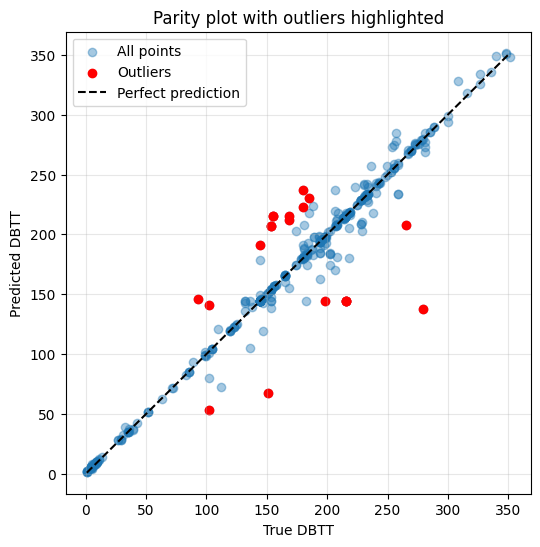

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.4, label='All points')
plt.scatter(y_true[outlier_mask], y_pred[outlier_mask], color='red', label='Outliers')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', label='Perfect prediction')
plt.xlabel('True DBTT')
plt.ylabel('Predicted DBTT')
plt.title('Parity plot with outliers highlighted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

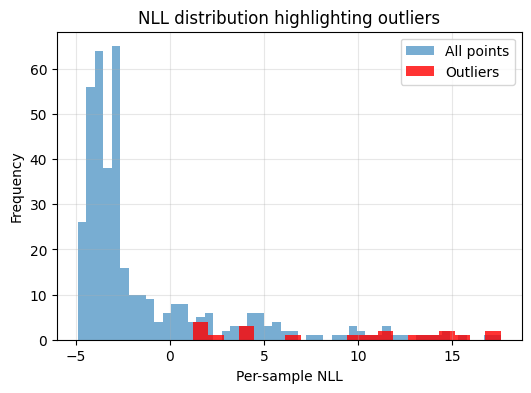

In [10]:
plt.figure(figsize=(6,4))
plt.hist(nll_per_sample, bins=50, alpha=0.6, label='All points')
plt.hist(nll_per_sample[outlier_mask], bins=20, alpha=0.8, color='red', label='Outliers')
plt.xlabel('Per-sample NLL')
plt.ylabel('Frequency')
plt.title('NLL distribution highlighting outliers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
import pandas as pd
import numpy as np
import torch

# -----------------------
# Identify outliers
# -----------------------
percentile = 95  # top 5% absolute error
error_threshold = np.percentile(abs_error, percentile)
outlier_mask = abs_error >= error_threshold
outlier_idx = np.where(outlier_mask)[0]

# -----------------------
# Create performance table
# -----------------------
table_data = {
    "Index": outlier_idx,
    "True DBTT": y_true[outlier_mask],
    "Predicted DBTT": y_pred[outlier_mask],
    "Absolute Error": abs_error[outlier_mask],
    "NLL": nll_per_sample[outlier_mask]
}

outlier_table = pd.DataFrame(table_data)
outlier_table = outlier_table.sort_values(by="Absolute Error", ascending=False)
outlier_table.reset_index(drop=True, inplace=True)

print(outlier_table)

    Index   True DBTT  Predicted DBTT  Absolute Error        NLL
0     221  279.027486      137.640121      141.387364   2.296440
1     322  150.687610       67.897392       82.790217  14.500648
2     285  215.465215      144.171906       71.293309   4.448225
3     295  215.465215      144.510300       70.954915  11.145260
4      91  215.465215      144.519806       70.945409  11.677619
5     136  155.438596      215.519424       60.080828  16.875319
6     233  155.438596      215.373352       59.934756  17.579338
7     123  179.921967      237.405746       57.483780   4.139054
8     142  264.967021      207.549942       57.417079  15.426431
9     160  198.143708      144.214142       53.929566   6.593534
10    143  153.398299      206.885391       53.487093  14.719639
11    361  153.398299      206.679550       53.281252  14.271049
12    151   92.737473      145.876022       53.138549   1.226659
13    327  101.823730       53.493340       48.330391   1.341439
14    171  168.421053    

In [12]:
table_data = {
    "True DBTT": y_true,  # already NumPy or Pandas
    "Predicted DBTT": y_pred,  # already NumPy
    "Absolute Error": abs_error,  # already NumPy
    "NLL": nll_per_sample.cpu().numpy() if torch.is_tensor(nll_per_sample) else nll_per_sample,
    "mu": mu_t.cpu().numpy() if torch.is_tensor(mu_t) else mu_t,
    "v": v_t.cpu().numpy() if torch.is_tensor(v_t) else v_t,
    "alpha": a_t.cpu().numpy() if torch.is_tensor(a_t) else a_t,
    "beta": b_t.cpu().numpy() if torch.is_tensor(b_t) else b_t,
}

table = pd.DataFrame(table_data)
table.to_csv("uncertainity_data.csv")